# "Gamma_Correction_in_Python_FlexTouch"
> "In this blog, we test Gamma Correction and its implementation in Python"

- toc: false
- branch: master
- badges: true
- comments: true
- categories: [fastpages, jupyter]
- hide: false
- search_exclude: true
- metadata_key1: metadata_value1
- metadata_key2: metadata_value2

# Image Open Difference

## Open CV
OpenCV (cv2.imread) Output Format:

1. In OpenCV (cv2), when you read an image using cv2.imread, it returns a NumPy array.
2. The NumPy array representation has the following characteristics:
> Channels: The channels are also represented as a 3-dimensional NumPy array with shape (height, width, channels).\
> Data Type: Pixel values in each channel are typically represented as integers in the range [0, 255] using the uint8 data type.\
> Color Order: OpenCV uses the BGR (Blue, Green, Red) color channel order by default. This means the first channel corresponds to Blue, the second to Green, and the third to Red.

<class 'numpy.ndarray'>


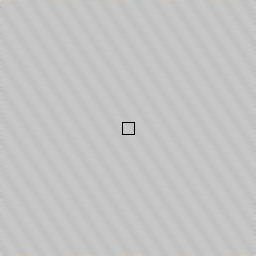

In [50]:
import cv2
from PIL import Image
img_cv2 = cv2.imread('B_example_2.png')
print(type(img_cv2))
# as opencv loads in BGR format by default, we want to show it in RGB.
display(Image.fromarray(cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB)))

## PIL
Pillow (Image.open) Output Format:\

1. In Pillow, when you open an image using Image.open, it returns a Pillow Image object.\
2. The image object has the following characteristics:\
> Channels: The image object can be accessed as R, G, and B channels using the split() method. For example, you can access the Red channel as img.split()[0].\
> Data Type: The pixel values in each channel are typically represented as integers in the range [0, 255] using the uint8 data type.\
> Color Order: The channels are in RGB order, meaning the first channel corresponds to Red, the second to Green, and the third to Blue.\

<class 'PIL.PngImagePlugin.PngImageFile'>


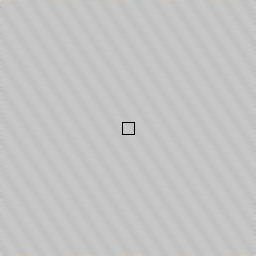

In [51]:
from PIL import Image
img_pil = Image.open('B_example_2.png')
print(type(img_pil))
display(img_pil)

## Skimage
scikit-image (io.imread) Output Format:

1. In scikit-image, when you read an image using io.imread, it returns a NumPy array.
2. The NumPy array representation has the following characteristics:
> Channels: The channels are represented as a 3-dimensional NumPy array with shape (height, width, channels).\
> Data Type: Pixel values in each channel are also typically represented as integers in the range [0, 255] using the uint8 data type.\
> Color Order: The channels are in RGB order, following the standard RGB color space.

<class 'numpy.ndarray'>


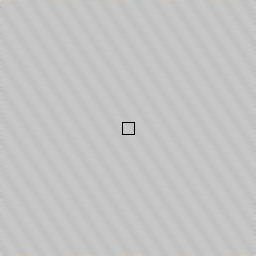

In [52]:
from skimage import io
from PIL import Image
img_skimage = io.imread('B_example_2.png')
print(type(img_skimage))
display(Image.fromarray(img_skimage))

In [53]:
import numpy as np
arr_skimage = img_skimage
arr_cv2 = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB)
arr_pil = np.array(img_pil)

MSE_sk_cv2 = np.square(np.subtract(arr_skimage,arr_cv2)).mean() 
MSE_cv2_pil = np.square(np.subtract(arr_cv2,arr_pil)).mean() 

print(MSE_sk_cv2)
print(MSE_cv2_pil)

0.0
0.0


cv2.imread() output image as numpy array in BGR channel order\
PIL.Image.open() output Image object in RGB channel order, used as input in ImageEnhance\
skimage.io.imread() output image as numpy array in RGB channel order\

image array in RGB channel order is the same from three methods

# Gamma Correction
Our eyes do not perceive light the way cameras do. With a digital camera, when twice the number of photons hit the sensor, it receives twice the signal (a "linear" relationship). Pretty logical, right? That's not how our eyes work. Instead, we perceive twice the light as being only a fraction brighter — and increasingly so for higher light intensities (a "nonlinear" relationship).



## Open CV

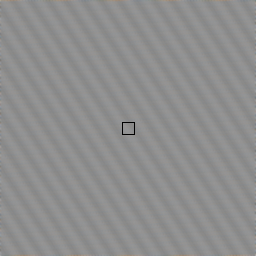

In [54]:
import cv2
import numpy as np
# Bad Moire
img = cv2.imread('B_example_2.png')
# Increase Gamma
gamma = 2.2
gamma_corrected = (cv2.pow(img/255.0, gamma) * 255).astype(np.uint8)
display(Image.fromarray(cv2.cvtColor(gamma_corrected, cv2.COLOR_BGR2RGB)))

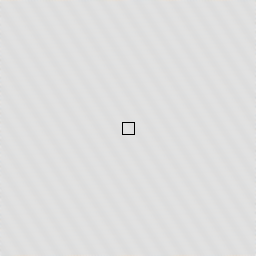

In [55]:
# Decrease Gamma
gamma = 0.5
img = cv2.imread('B_example_2.png')
gamma_corrected = (cv2.pow(img/255.0, gamma) * 255).astype(np.uint8)
display(Image.fromarray(cv2.cvtColor(gamma_corrected, cv2.COLOR_BGR2RGB)))

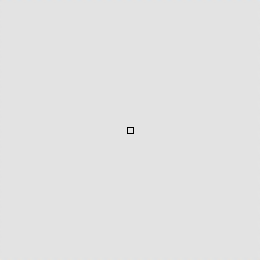

In [56]:
# Good Moire
gamma = 0.5
img = cv2.imread('S_example.png')
gamma_corrected = (cv2.pow(img/255.0, gamma) * 255).astype(np.uint8)
display(Image.fromarray(cv2.cvtColor(gamma_corrected, cv2.COLOR_BGR2RGB)))

## PIL ImageEnhance.Brightness

https://pillow.readthedocs.io/en/stable/reference/ImageEnhance.html

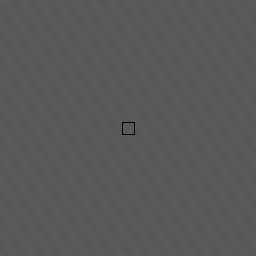

In [57]:
from PIL import Image, ImageEnhance
# Bad Moire
# Increase Gamma
gamma = 2.2
img = Image.open('B_example_2.png')
enhancer = ImageEnhance.Brightness(img)
gamma_corrected = enhancer.enhance(1/gamma)
display(gamma_corrected)

Image is much darker than cv2 gamma enhance

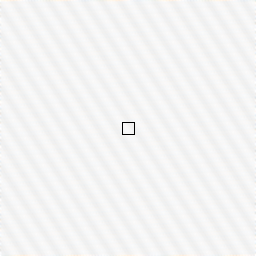

In [58]:
# Bad Moire
# Decrease Gamma
gamma = 0.8
img = Image.open('B_example_2.png')
enhancer = ImageEnhance.Brightness(img)
gamma_corrected = enhancer.enhance(1/gamma)
display(gamma_corrected)

PIL ImageEnhance.Brightness adjust Gamma based on factor differ from Gamma correction. And no need to change datatype to uint8.\
This class can be used to control the brightness of an image. An enhancement factor of 0.0 gives a black image, a factor of 1.0 gives the original image, and greater values increase the brightness of the image.

## Skimamge

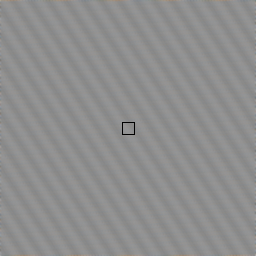

In [59]:
from skimage import exposure, io
# Bad Moire
# Increase Gamma
img = io.imread('B_example_2.png')
gamma = 2.2
gamma_corrected = exposure.adjust_gamma(img, gamma)
display(Image.fromarray(gamma_corrected))


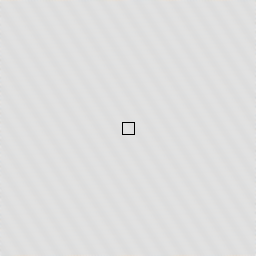

In [60]:
# Bad Moire
# Decrease Gamma
img = io.imread('B_example_2.png')
gamma = 0.5
gamma_corrected = exposure.adjust_gamma(img, gamma)
display(Image.fromarray(gamma_corrected))

Looks similar to cv2 results, output array datatype is already uint8

## Compare Three Methods

Given same factor (Gamma), same image, comparing MSE between outputs

In [61]:
import numpy as np
import cv2
from PIL import Image, ImageEnhance
from skimage import exposure, io
from sklearn.metrics import mean_squared_error
S_img_arr_array_rgb = io.imread('S_example.png')
B_img_arr_array_rgb = io.imread('B_example_2.png')

In [62]:
# Comparing Bad Moire
gamma = 2.2
# cv2
cv2_gamma_arr = (cv2.pow(B_img_arr_array_rgb/255.0, gamma) * 255).astype(np.uint8)
# PIL
enhancer = ImageEnhance.Brightness(Image.fromarray(B_img_arr_array_rgb))
gamma_corrected = enhancer.enhance(1/gamma)
pil_gamma_arr = np.array(gamma_corrected)
# skimage
skimage_gamma_arr = exposure.adjust_gamma(img, gamma)



In [63]:
# Calculate MSE
MSE_sk_cv2 = np.square(np.subtract(cv2_gamma_arr,skimage_gamma_arr)).mean() 
print('MSE cv2, skimage:', MSE_sk_cv2)

MSE_cv2_pil = np.square(np.subtract(cv2_gamma_arr,pil_gamma_arr)).mean()
print('MSE cv2, PIL:', MSE_cv2_pil)

MSE cv2, skimage: 0.0
MSE cv2, PIL: 135.13585408528647


## Results: 

cv2 and skimage gamma correction gives same results, PIL brightness enhance use the difference calculation, not the gamma correction

# Next Step:

How to use the Gamma correction in postprocessing workflow?
1. use before Gaussian or after Gaussian
2. Only use on grayscale image?
3...

# References:

https://www.cambridgeincolour.com/tutorials/gamma-correction.htm

https://cloud.tencent.com/developer/article/2155360

https://learnopengl-cn.github.io/05%20Advanced%20Lighting/02%20Gamma%20Correction/

https://www.youtube.com/watch?v=wFx0d9c8WMs
